#**Problem 1 Bengali Handwritten Digits**

The English handwritten digit recognition is one of the most popular problems in machine learning and computer vision. This problem is solved using various techniques. In this assignment, we will classify Bengali Handwritten Digits using logistic regression.
 
Handwritten Digits classification can be used in various applications like optical character recognition, restore text from old documents, etc.
In this assignment our main goal will be to achieve a good result using logistic regression and tuning hyperparameters correctly to get a better result.
 




#**Dataset**


> For this experiment, we will use the dataset [NumtaDB](https://www.kaggle.com/BengaliAI/numta/) which is available in **Kaggle**. 
There will be a total of **54908** images, and it was split in a **90:10** ratio. **90%** (**49417**) of data is used in training and **10%** (**5491**) was used in testing.

#Snapshot of Dataset

> <div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>

#**Experimental Setup**


> All of these experiments were performed using Google Colab free GPU, Models were created in PyTorch. 


During the whole experiment,
* The height and width of the input was **28*28 =784** 
* Output dimension was **(০,১,২,৩,৪,৫,৬,৭,৮,৯)=10**
* Each batch size was **256**
* The number of iteration was **4000**
* **Softmax** activation function was used 
* GPU **Tesla T4** was availabe
* Number of Epochs **20**

- **totaldata:** 54908




> - **minibatch:** 256
- **iterations:** 4,000
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 4000 \div \frac{54908}{256} = 20.72 == 20 $

We will use different optimizer and learning rate to achieve better performance

# **Result**


| Experiment Number      | Optimizer     | Learning Rate    | | Accurecy of last 500 iterations    |
| :------------- | :----------: | :-----------: || :-----------: |
|  1 |SGD   | 0.01    ||38.12  |
|  2 |SGD   | 0.02    ||  40.07 |
| 3   | SGD | 0.03 || 36.24 |
|  4 |Adam   | 0.0001    ||35.95 |
|  5 |Adam  | 0.0002   || 38.72 |
|  6 |Adam   | 0.0003    || 40.23 | |


From the result, it is can be said that when **SGD** optimizer is used for the first setup accuracy was **38.12** and loss was **decreasing**, and when we set the learning rate 0.02 accuracy was **40.07** which was better than the last setup, and then when the learning rate was increased accuracy decreased to **36.24** and loss graph was **increasing**, so it can be said that optimal learning rate for this setup is between **0.01-0.02**.
 
 
And when **Adam** optimizer is used for the first setup accuracy was **35.95** and loss was **increasing in the last 500 iterations**, and when we set the learning rate **0.0002** accuracy was **38.72** which was better than the last setup, and then when the learning rate was increased accuracy increased to **40.23** and loss graph was increasing **in last 500 iterations**, so it can be said that optimal learning rate for this setup is can be **more than 0.0003**. so more accurate results can be found if we increase the learning rate.



**Download Dataset Direct From Kaggle**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Importing All Important Library**

In [ ]:
import os 
import zipfile 
import matplotlib.pyplot as plt
import pandas as pd
import shutil 
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from PIL import *
from torch.utils.data import Dataset
print(torch.cuda.get_device_name())

Tesla T4


**Download Kaggle Dataset**

In [ ]:
!kaggle datasets download -d BengaliAI/numta

 99% 1.89G/1.91G [00:19<00:01, 12.9MB/s]
100% 1.91G/1.91G [00:19<00:00, 105MB/s] 


**Unzip Dataset and Create new local Directory**

In [ ]:
local_dir='/content/numta.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
extract_loc='/tmp'
zip_ref.extractall(extract_loc)
zip_ref.close
TRAIN_PATH="/tmp/train"
os.mkdir(TRAIN_PATH)


**Function For Copying Image and Merging CSV**

In [ ]:
def copy_image(src,ls):
  for image in ls:
    file_name = os.path.join(src, image)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  
def merge_csv(path,col_list):
  df=pd.read_csv(path,usecols=col_list)
  merged_csv_new = pd.concat(df)      

**Reading and Merging CSV**

In [ ]:
col_list = ["filename", "digit"]
folder=os.listdir(extract_loc)
csv_name=[]
for files in folder:
  if files.endswith(".csv")  and not files.startswith("training-b") and not files.startswith("training-e"):
    path=extract_loc+"/"+files
    df=pd.read_csv(path,usecols=col_list)
    csv_name.append(df)
merged_csv = pd.concat(csv_name,ignore_index=True) 

**Copying Image**

In [ ]:
folder=os.listdir(extract_loc)
for files in folder:
  if files.startswith("training") and not files.endswith(".csv") and not files.startswith("training-b") and not files.startswith("training-e") :
    path=extract_loc+"/"+files
    src = path + '/'
    copy_image(src,os.listdir(path))
 

**Function For Dataset Preparation**

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

dataset  = Dataset(merged_csv, TRAIN_PATH, train_transform)





**Displaying Image and Label**

Trainig label:  3


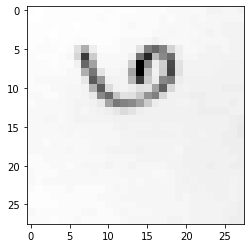

In [ ]:
show_img = dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print("Trainig label: ",dataset[1][1])

**Train and Test Data Split**

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size = 0.1)

**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


#**Experiment 1:**
* **Optimizer =SGD**
* **Learning rate =0.01**


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.222965717315674. Accuracy: 21.58
Iteration: 1000. Loss: 2.159410238265991. Accuracy: 28.81
Iteration: 1500. Loss: 2.071463108062744. Accuracy: 33.49
Iteration: 2000. Loss: 2.0656909942626953. Accuracy: 34.91
Iteration: 2500. Loss: 2.0255610942840576. Accuracy: 38.43
Iteration: 3000. Loss: 2.0070855617523193. Accuracy: 39.45
Iteration: 3500. Loss: 1.9863837957382202. Accuracy: 38.12


**Loss show**

[2.222965717315674, 2.159410238265991, 2.071463108062744, 2.0656909942626953, 2.0255610942840576, 2.0070855617523193, 1.9863837957382202]


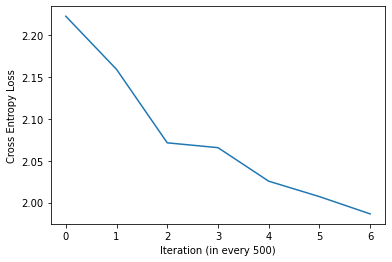

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 2:**
* **Optimizer =SGD**
* **Learning rate =0.02**

**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.02

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.1265509128570557. Accuracy: 27.34
Iteration: 1000. Loss: 2.0348310470581055. Accuracy: 33.42
Iteration: 1500. Loss: 2.0111348628997803. Accuracy: 38.72
Iteration: 2000. Loss: 2.003283739089966. Accuracy: 38.63
Iteration: 2500. Loss: 1.9633527994155884. Accuracy: 37.15
Iteration: 3000. Loss: 1.9064600467681885. Accuracy: 37.39
Iteration: 3500. Loss: 1.873541235923767. Accuracy: 40.07


**Loss show**

[2.1265509128570557, 2.0348310470581055, 2.0111348628997803, 2.003283739089966, 1.9633527994155884, 1.9064600467681885, 1.873541235923767]


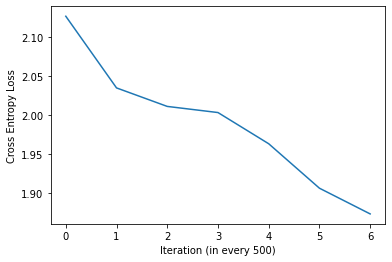

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 3:**
* **Optimizer =SGD**
* **Learning rate =0.03**

**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.03

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.165266752243042. Accuracy: 23.46
Iteration: 1000. Loss: 2.0430500507354736. Accuracy: 27.63
Iteration: 1500. Loss: 2.0820140838623047. Accuracy: 31.74
Iteration: 2000. Loss: 1.9786704778671265. Accuracy: 23.07
Iteration: 2500. Loss: 1.8922452926635742. Accuracy: 36.57
Iteration: 3000. Loss: 1.8198736906051636. Accuracy: 40.03
Iteration: 3500. Loss: 1.8490642309188843. Accuracy: 36.24


**Loss show**

[2.165266752243042, 2.0430500507354736, 2.0820140838623047, 1.9786704778671265, 1.8922452926635742, 1.8198736906051636, 1.8490642309188843]


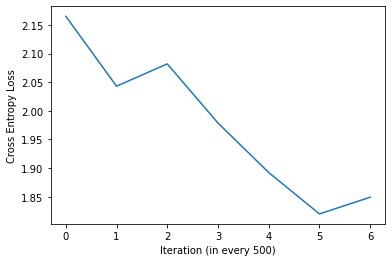

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 4:**
* **Optimizer =Adam**
* **Learning rate =0.0001**


**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.2527060508728027. Accuracy: 19.56
Iteration: 1000. Loss: 2.1998798847198486. Accuracy: 29.74
Iteration: 1500. Loss: 2.1719064712524414. Accuracy: 31.85
Iteration: 2000. Loss: 2.141324281692505. Accuracy: 33.42
Iteration: 2500. Loss: 2.143914222717285. Accuracy: 36.99
Iteration: 3000. Loss: 2.0789644718170166. Accuracy: 36.46
Iteration: 3500. Loss: 2.0915143489837646. Accuracy: 35.95


**Loss show**

[2.2527060508728027, 2.1998798847198486, 2.1719064712524414, 2.141324281692505, 2.143914222717285, 2.0789644718170166, 2.0915143489837646]


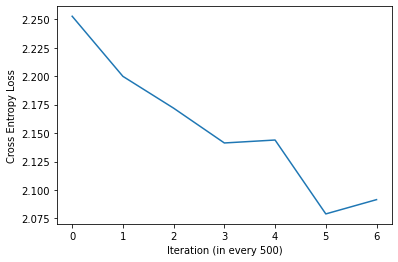

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 5:**
* **Optimizer =Adam**
* **Learning rate =0.0002**

**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.0002

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.2065460681915283. Accuracy: 29.23
Iteration: 1000. Loss: 2.1632578372955322. Accuracy: 31.27
Iteration: 1500. Loss: 2.0427167415618896. Accuracy: 34.88
Iteration: 2000. Loss: 2.055973529815674. Accuracy: 38.57
Iteration: 2500. Loss: 2.012009382247925. Accuracy: 35.57
Iteration: 3000. Loss: 2.0098001956939697. Accuracy: 40.41
Iteration: 3500. Loss: 1.9605414867401123. Accuracy: 38.72


**Loss show**

[2.2065460681915283, 2.1632578372955322, 2.0427167415618896, 2.055973529815674, 2.012009382247925, 2.0098001956939697, 1.9605414867401123]


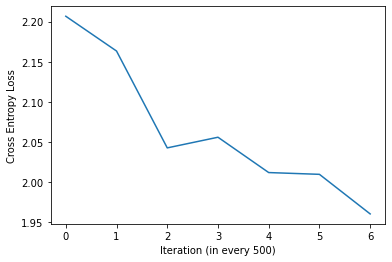

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#**Experiment 6:**
* **Optimizer =Adam**
* **Learning rate =0.0003**

**Hyperparameters**

In [ ]:
# Hyperparameters

batch_size = 256
num_iters = 4000
input_dim = 28*28 
output_dim = 10

learning_rate = 0.0003

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Train and Test Data Loading**

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)  

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  


**Logistic Regression Model**

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

**INSTANTIATE MODEL CLASS**

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**Optimizer setup**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**Function TRAIN THE MODEL**

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), round(accuracy, 2)))

Iteration: 500. Loss: 2.1760060787200928. Accuracy: 33.95
Iteration: 1000. Loss: 2.13908314704895. Accuracy: 36.13
Iteration: 1500. Loss: 2.0530595779418945. Accuracy: 37.26
Iteration: 2000. Loss: 1.9947524070739746. Accuracy: 36.84
Iteration: 2500. Loss: 1.969038486480713. Accuracy: 39.01
Iteration: 3000. Loss: 1.889222502708435. Accuracy: 40.3
Iteration: 3500. Loss: 1.9499284029006958. Accuracy: 40.23


**Loss show**

[2.1760060787200928, 2.13908314704895, 2.0530595779418945, 1.9947524070739746, 1.969038486480713, 1.889222502708435, 1.9499284029006958]


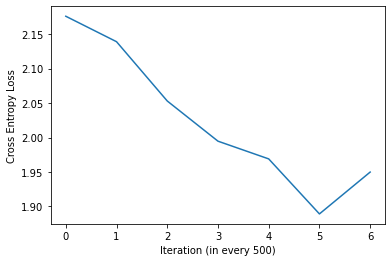

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()